In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

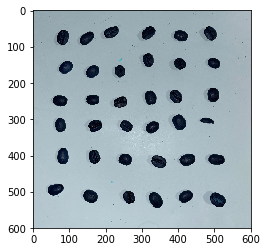

In [2]:
examplebeans = cv2.resize(cv2.imread('beans.jpg'),(600,600))
plt.imshow(examplebeans)

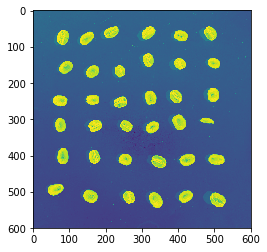

In [3]:
examplebeansr = examplebeans[:,:,1]
beansflip = cv2.bitwise_not(examplebeansr)
plt.imshow(beansflip)

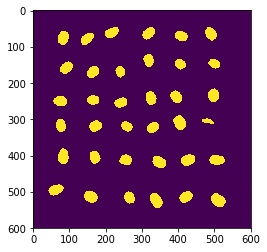

In [9]:
_, mask = cv2.threshold(beansflip, thresh=150, maxval=255, type=cv2.THRESH_OTSU)
kernel = np.ones((10,10),np.uint8)
kernel2 = np.ones((12,12),np.uint8)
maskop= cv2.morphologyEx(mask, cv2.MORPH_DILATE,kernel)
maskop2= cv2.morphologyEx(maskop, cv2.MORPH_ERODE,kernel2)
plt.imshow(maskop2)

True

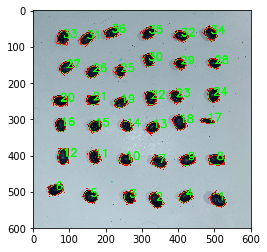

In [10]:
contours, hierarchy = cv2.findContours(maskop2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
final = cv2.drawContours(examplebeans, contours, -1, (0,255,0), 1)

for (i,c) in enumerate(contours):
    M= cv2.moments(c)
    cx= int(M['m10']/M['m00'])
    cy= int(M['m01']/M['m00'])
    cv2.putText(final, text= str(i+1), org=(cx,cy),
            fontFace= cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0,255,0),
            thickness=2, lineType=cv2.LINE_AA)

plt.imshow(final)
cv2.imwrite('c:/users/njwit/output2.png', final)

True

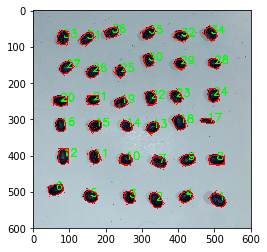

In [6]:
minRect = [None]*len(contours)
minEllipse = [None]*len(contours)
for i, c in enumerate(contours):
    minRect[i] = cv2.minAreaRect(c)
    if c.shape[0] > 5:
        minEllipse[i] = cv2.fitEllipse(c)
    
drawing = examplebeans
color = (255,0,0)
for i, c in enumerate(contours):
        # contour
        cv2.drawContours(drawing, contours, i, color)
        # ellipse
        if c.shape[0] > 5:
            cv2.ellipse(drawing, minEllipse[i], color, 2)
        # rotated rectangle
        box = cv2.boxPoints(minRect[i])
        box = np.intp(box) #np.intp: Integer used for indexing (same as C ssize_t; normally either int32 or int64)
        cv2.drawContours(drawing, [box], 0, color)
        
plt.imshow(final)
cv2.imwrite('c:/users/njwit/output2.png', final)